In [7]:
from sklearn.datasets import fetch_california_housing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = fetch_california_housing()

df

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [10]:
dataset=pd.DataFrame(df.data)
dataset

,0,1,2,3,4,5,6,7
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [11]:
dataset.columns=df.feature_names
dataset.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


#IF have null value or missing value do EDA ,This datasets is default datsets so don't need to do EDA or FS and FS because here has no null or missing value.If you upload any datasets from external than always do EDA beacuse there may Null values

In [12]:
#Independent feature and dependent feature
X=dataset
y=df.target

In [13]:
y

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [40]:
#train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)

In [41]:
X_train.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
7061,4.1312,35.0,5.882353,0.975490,1218.0,2.985294,33.93,-118.02
14689,2.8631,20.0,4.401210,1.076613,999.0,2.014113,32.79,-117.09
17323,4.2026,24.0,5.617544,0.989474,731.0,2.564912,34.59,-120.14
10056,3.1094,14.0,5.869565,1.094203,302.0,2.188406,39.26,-121.00
15750,3.3068,52.0,4.801205,1.066265,1526.0,2.298193,37.77,-122.45


In [42]:
y_train

array([1.938, 1.697, 2.598, ..., 2.221, 2.835, 3.25 ])

In [43]:
#standardizing the dataset -Step 1
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()



In [44]:
X_train=scaler.fit_transform(X_train)


In [46]:
#for inverse transform--
#scaler.inverse_transform(X_train)

In [47]:
X_test=scaler.transform(X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [34]:
from sklearn.linear_model import LinearRegression# the problem is multi linear regression because of more feature

In [48]:
#cross validation-hyperparemeter tuning-step 2
from sklearn.model_selection import cross_val_score


In [73]:
regression=LinearRegression()
regression.fit(X_train,y_train)


LinearRegression()

In [74]:
MSE=cross_val_score(regression,X_train,y_train,scoring='neg_mean_squared_error',cv=5, n_jobs=None, verbose=0, params=None, pre_dispatch='2*n_jobs', error_score=np.nan)#scoring -The scoring parameter tells which performance metric to use when evaluating the model during cross-validation.You can use other scoring tehnique MAE, RMSE, F1 score ,pression ,recall
#for other paremeter documentation-"https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html" #The verbose parameter is used to control how much information is printed to the screen during execution.
#error_score=np.nan----If an error occurs while training or scoring a model (like a bad parameter setting), don't crash — just record the error score as NaN (Not a Number).

| `verbose` value | Meaning                                                 |
| --------------- | ------------------------------------------------------- |
| `0` (default)   | **Silent** — shows nothing                              |
| `1`             | **Minimal output** — shows basic progress               |
| `2` or higher   | **More detailed** info — shows updates per loop or fold |


In [76]:
MSE

array([-0.54787556, -0.500835  , -0.52045639, -0.51612252, -0.54883741])

In [78]:
np.mean(MSE)#mean accuracy after 5 fold cv

np.float64(-0.5268253746355748)

In [81]:
#prediction by test data
reg_pred=regression.predict(X_test)
reg_pred

array([-37.84741618, -37.11081487, -36.70791505, ..., -37.08104512,
       -37.25035096, -37.28768464])

Text(0.5, 1.0, 'Actual vs Predicted')

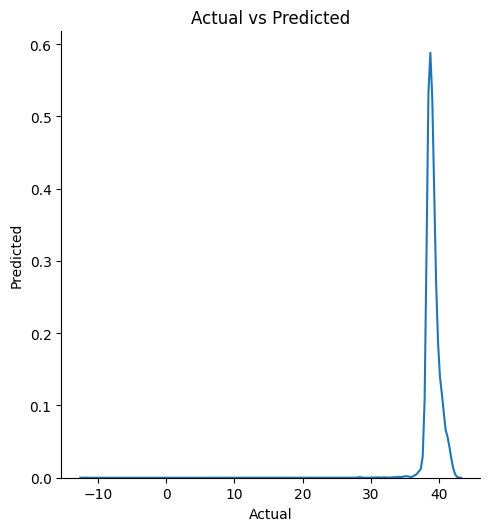

In [93]:
sns.displot(y_test-reg_pred,kind='kde')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")

Text(0.5, 1.0, 'Actual vs Predicted')

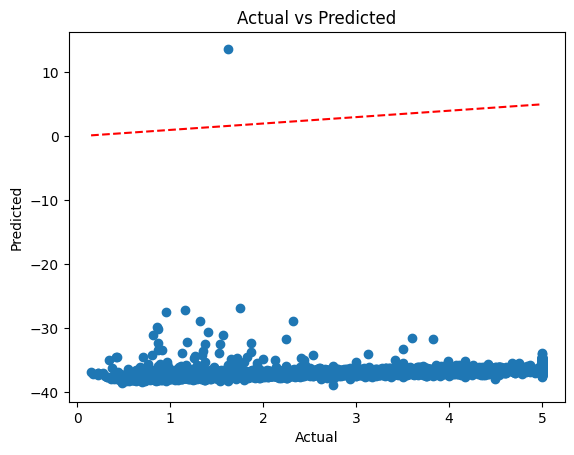

In [92]:
#2nd way to visuliaze
plt.scatter(y_test, reg_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")


#observation

✅ 1. Residuals are not centered around 0
Ideally, for a well-performing regression model, the residuals (y_test - y_pred) should be centered around 0.

But in your plot, the residuals are centered around ~38.

This means your model is consistently underpredicting the actual values by around 38 units.

✅ 2. High bias / systematic error
Since residuals are shifted far from 0, this indicates a bias in the model’s predictions.

It’s not just random error — your model is making the same kind of mistake repeatedly (underestimation).

✅ 3. Residual spread (variance) looks low
The residuals are tightly packed, which may mean:

The model is consistently underpredicting by a similar amount.

This is a case of low variance, high bias — model is stable but systematically wrong.

🧠 How to realize this from the plot:
KDE (kernel density estimate) plot shows where most residual values lie.

Peak around 38 = most predictions are ~38 units below the actual values.

Almost no values near 0 = model rarely gets close to the true value.

Skewed shape with long tail on the left side = occasionally overpredicts (but rarely).



In [94]:
from sklearn.metrics import r2_score
score=r2_score(y_test,reg_pred)
score

-1166.744736983937